**Question 1:** What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.  

Answer:  Anomaly Detection is the process of identifying data points, observations, or events that deviate significantly from the majority of the data.

These unusual patterns are called anomalies, outliers, or novelties.

It is widely used in:

Fraud detection

Network security

Fault detection

Medical diagnosis

Industrial monitoring

**Point Anomalies** (Global Outliers)

A single data point that is far from the rest of the data.

Example:

Credit card transaction of $10,000 when the user usually spends $50–$100.

Temperature reading of 100°C in a city where the normal range is 20–35°C.



**Contextual Anomalies**

An observation is abnormal only in a specific context (time, location, season, etc.).

Example:

 30°C temperature:

Normal in summer

Anomalous in winter

High website traffic at 3 AM





 **Collective Anomalies**

A group of related data points that are anomalous together, even if individual points are normal.

Example:  

Sudden spike pattern in ECG signal

Repeated small fraudulent transactions

Continuous failed login attempts


**Question 2:** Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.  

Answer:
| Feature                     | Isolation Forest                       | DBSCAN                                   | Local Outlier Factor (LOF)                     |
| --------------------------- | -------------------------------------- | ---------------------------------------- | ---------------------------------------------- |
| **Type**                    | Tree-based                             | Density-based clustering                 | Density-based local comparison                 |
| **Main Idea**               | Isolates anomalies using random splits | Finds dense clusters                     | Compares local density of a point to neighbors |
| **How It Detects Outliers** | Anomalies require fewer splits         | Points not in dense regions are outliers | Points with lower density than neighbors       |
| **Works Well For**          | High-dimensional data                  | Spatial/geographical data                | Local density variations                       |
| **Scalability**             | Very scalable                          | Moderate                                 | Moderate                                       |
| **Handles Noise**           | Yes                                    | Yes                                      | Yes                                            |



**Question 3:** What are the key components of a Time Series? Explain each with one example.

 Answer:

  1. Trend

Long-term movement in the data.

Example:

Increasing company revenue over years.

Decreasing pollution levels over decades.

2. Seasonality

Regular repeating pattern over fixed time periods.

Example:

Ice cream sales increase every summer.

Retail sales spike every December.



3. Cyclical Component

Long-term oscillations without fixed period.

Example:

Economic boom and recession cycles.

Stock market cycles.



4. Irregular (Noise) Component

Random variations that cannot be explained.

Example:

Sudden pandemic effect

Natural disaster impact








**Question 4**: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Answer:Definition

A time series is stationary if:

Mean is constant over time

Variance is constant

Covariance depends only on lag (not time)

 How to Test Stationarity

1. Visual Inspection

Plot data and check trend/variance changes.

2. Statistical Tests

ADF Test (Augmented Dickey-Fuller)

KPSS Test

Decision rule (ADF):

p-value < 0.05 → stationary

p-value > 0.05 → non-stationary

How to Make Series Stationary

1. Differencing

Removes trend.

2. Log Transformation

Stabilizes variance.

3. Seasonal Differencing

Removes seasonal patterns.

4. Detrending

Subtract fitted trend line.

**Question 5:** Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
Answer:



| Model   | Handles Trend | Handles Seasonality | External Variables | Stationary Required |
| ------- | ------------- | ------------------- | ------------------ | ------------------- |
| AR      | No            | No                  | No                 | Yes                 |
| MA      | No            | No                  | No                 | Yes                 |
| ARIMA   | Yes           | No                  | No                 | After differencing  |
| SARIMA  | Yes           | Yes                 | No                 | After differencing  |
| SARIMAX | Yes           | Yes                 | Yes                | After differencing  |


/tmp/ipython-input-3289648860.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


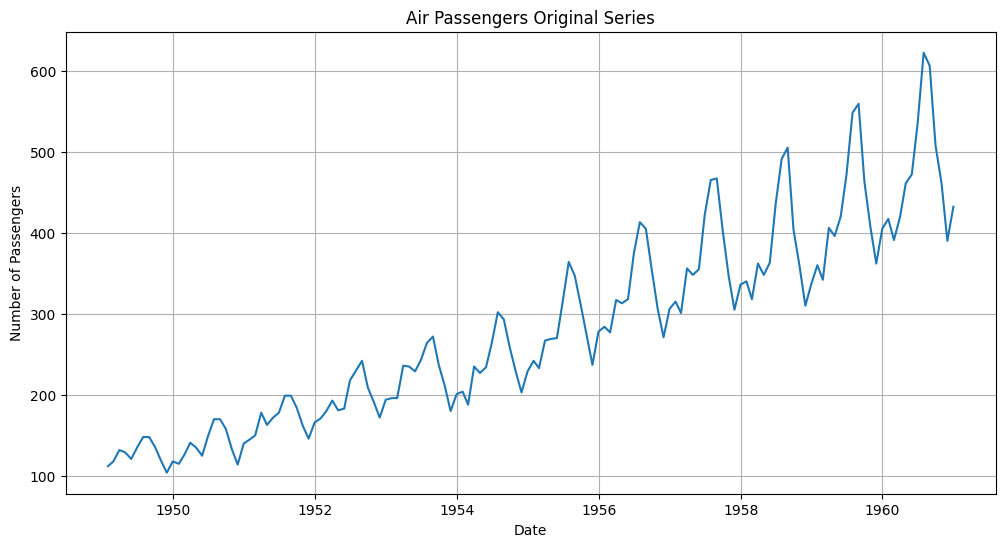

<Figure size 1200x800 with 0 Axes>

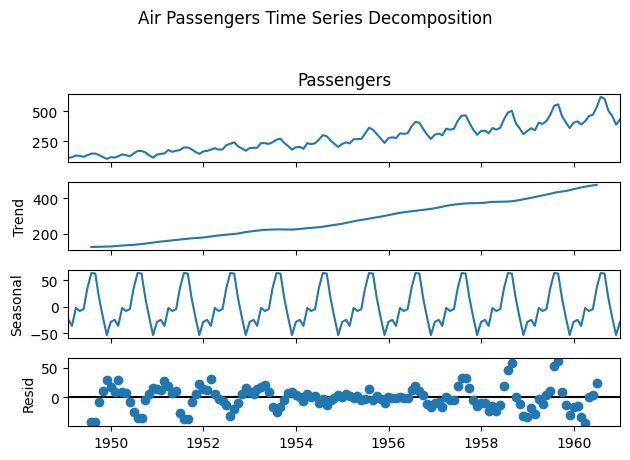

In [ ]:
# Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
data = get_rdataset("AirPassengers").data

# Create a proper DatetimeIndex for monthly data starting Jan 1949
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# Rename column
data.rename(columns={'value': 'Passengers'}, inplace=True)

# Plot the original series
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'])
plt.title('Air Passengers Original Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Decompose the series
decomposition = seasonal_decompose(data['Passengers'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Air Passengers Time Series Decomposition')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

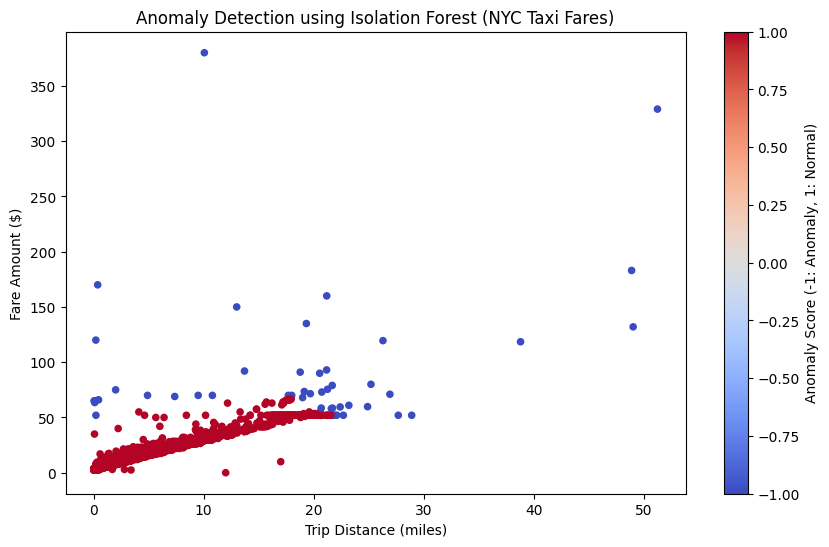

In [5]:
# Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/NYC_taxi_fare_data.csv")

# Keep only useful numerical columns
df = df[['fare_amount', 'trip_distance']]

# Remove invalid entries
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]

# Sample a subset for faster processing and visualization
df = df.sample(5000, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['fare_amount', 'trip_distance']])

# Apply Isolation Forest
# contamination is the proportion of outliers in the data set.
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_scaled)

# Predict anomalies (-1 for outliers, 1 for inliers)
df['anomaly'] = model.predict(X_scaled)

# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['fare_amount'], c=df['anomaly'], cmap='coolwarm', s=20)
plt.title('Anomaly Detection using Isolation Forest (NYC Taxi Fares)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.colorbar(label='Anomaly Score (-1: Anomaly, 1: Normal)')
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -507.178
Date:                             Wed, 25 Feb 2026   AIC                           1022.356
Time:                                     07:22:58   BIC                           1033.857
Sample:                                 01-31-1949   HQIC                          1027.029
                                      - 12-31-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2160      0.392     -0.551      0.582      -0.985       0.553
ma.L1         -0.0875      

/tmp/ipython-input-3934826289.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]


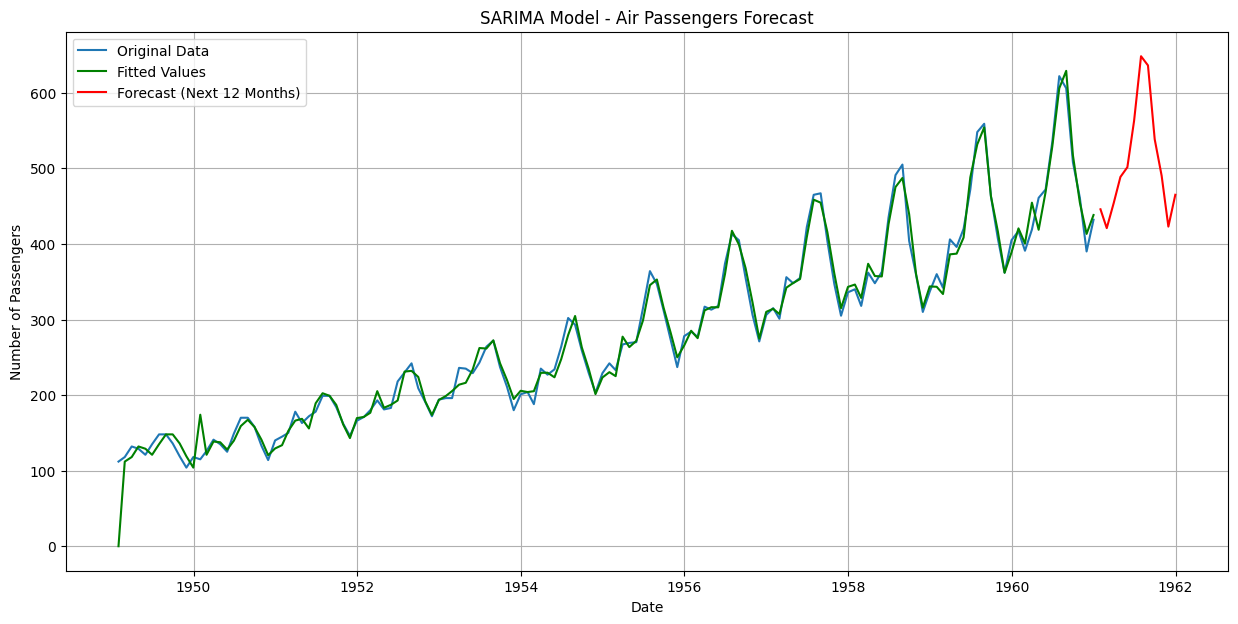

In [6]:
# Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure 'data' DataFrame is available from previous steps
# If not, uncomment and run the following lines:
# from statsmodels.datasets import get_rdataset
# data = get_rdataset("AirPassengers").data
# data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
# data.set_index('time', inplace=True)
# data.rename(columns={'value': 'Passengers'}, inplace=True)

# Define the SARIMA model order (p,d,q)(P,D,Q,S)
# This order is a common choice for the AirPassengers dataset after differencing (d=1, D=1)
# and analyzing ACF/PACF plots.
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 0, 12) # (P,D,Q,S)

# Initialize and fit the SARIMA model
model = SARIMAX(data['Passengers'], order=sarima_order, seasonal_order=seasonal_order)
sarima_results = model.fit(disp=False)

print(sarima_results.summary())

# Forecast the next 12 months
forecast_steps = 12
forecast = sarima_results.predict(start=len(data), end=len(data) + forecast_steps - 1)

# Create a date index for the forecast
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast.index = forecast_index

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(15, 7))
plt.plot(data['Passengers'], label='Original Data')
plt.plot(sarima_results.fittedvalues, color='green', label='Fitted Values')
plt.plot(forecast, color='red', label='Forecast (Next 12 Months)')
plt.title('SARIMA Model - Air Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


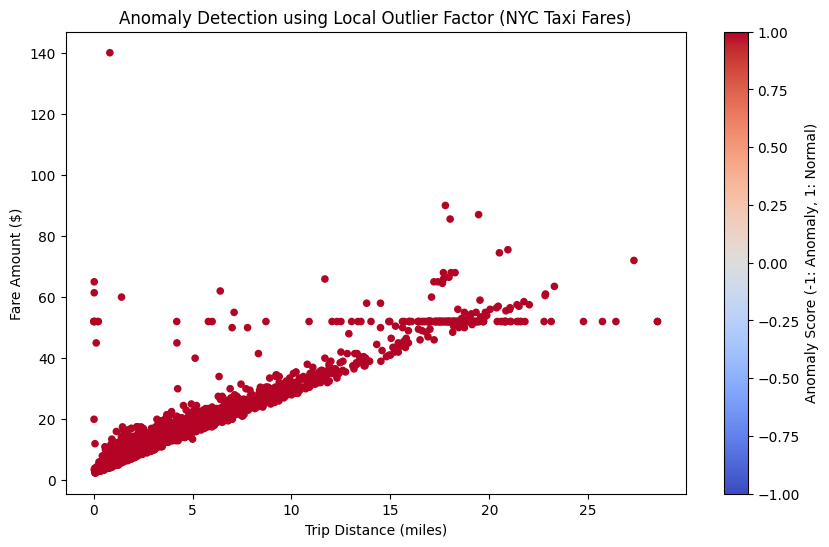

In [7]:
#Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Reuse the NYC Taxi Fare data if available from previous steps
# If not, you might need to load it again:
# df = pd.read_csv("/content/NYC_taxi_fare_data.csv")
# df = df[['fare_amount', 'trip_distance']]
# df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]
# df = df.sample(5000, random_state=42)

# Assume df and X_scaled are available from the Isolation Forest example
# If X_scaled is not available, scale the features first:
if 'X_scaled' not in locals():
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[['fare_amount', 'trip_distance']])

# Apply Local Outlier Factor
# novelty=False indicates that fit_predict is used on the training data
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=False)
# Predict anomalies (-1 for outliers, 1 for inliers)
df['lof_anomaly'] = lof.fit_predict(X_scaled)

# Visualize the anomalies
plt.figure(figsize=(10, 6))
# Use the 'original' values for plotting, not the scaled ones, for better interpretability
plt.scatter(df['trip_distance'], df['fare_amount'], c=df['lof_anomaly'], cmap='coolwarm', s=20)
plt.title('Anomaly Detection using Local Outlier Factor (NYC Taxi Fares)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.colorbar(label='Anomaly Score (-1: Anomaly, 1: Normal)')
plt.show()